04:37:17 - cmdstanpy - INFO - Chain [1] start processing
04:37:17 - cmdstanpy - INFO - Chain [1] done processing


----- Prophet Model Evaluation (Test Set) -----
R²: -0.5958
RMSE: 20063.05
MAE: 10721.82


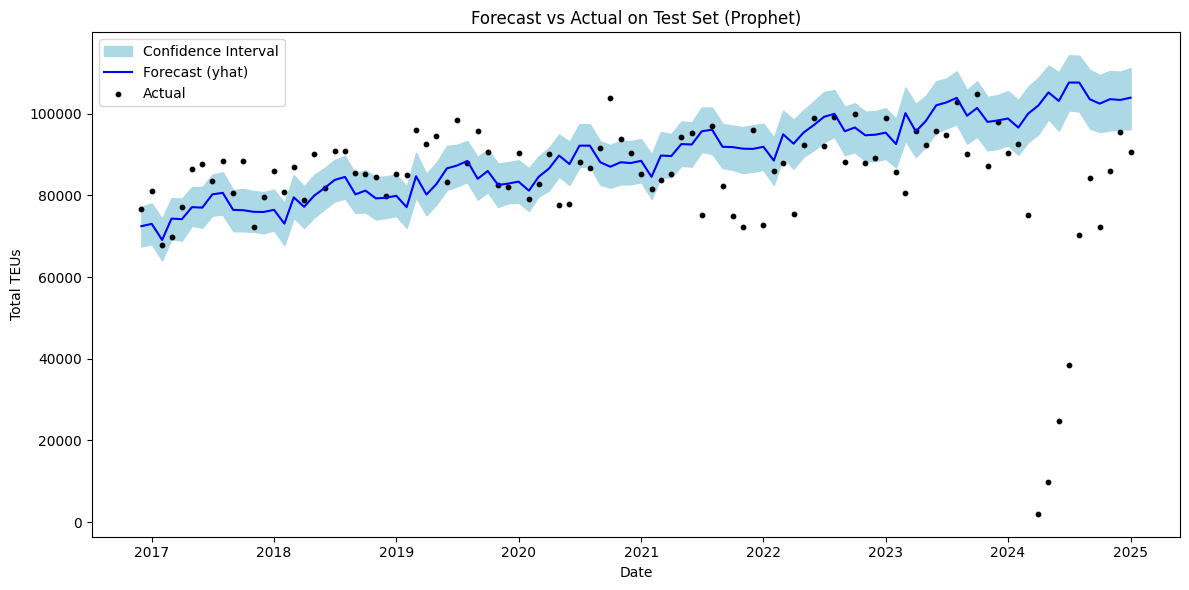

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 1. Load and prepare the data
df = pd.read_csv("Baltimore.csv")
df['ds'] = pd.to_datetime(df['Month'], format='%b-%y')
df = df[['ds', 'Total TEUs']].rename(columns={'Total TEUs': 'y'})
df = df.sort_values('ds').reset_index(drop=True)

# 2. Split into training and testing sets (by chronological order)
train_ratio = 0.7
split_index = int(len(df) * train_ratio)
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]

# 3. Fit Prophet model (using training set only)
model = Prophet()
model.fit(train_df)

# 4. Create future dataframe using test set dates
future = pd.DataFrame({'ds': test_df['ds']})
forecast = model.predict(future)

# 5. Merge forecast results with actual test data
forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
test_eval = test_df.merge(forecast, on='ds')

# 6. Model evaluation
rmse = np.sqrt(mean_squared_error(test_eval['y'], test_eval['yhat']))
mae = mean_absolute_error(test_eval['y'], test_eval['yhat'])
r2 = r2_score(test_eval['y'], test_eval['yhat'])

# 7. Print evaluation results
print("----- Prophet Model Evaluation (Test Set) -----")
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# 8. Visualization (test set forecast)
plt.figure(figsize=(12, 6))
plt.fill_between(test_eval['ds'], test_eval['yhat_lower'], test_eval['yhat_upper'], color='lightblue', label='Confidence Interval')
plt.plot(test_eval['ds'], test_eval['yhat'], color='blue', label='Forecast (yhat)')
plt.scatter(test_eval['ds'], test_eval['y'], color='black', s=10, label='Actual')
plt.title("Forecast vs Actual on Test Set (Prophet)")
plt.xlabel("Date")
plt.ylabel("Total TEUs")
plt.legend()
plt.tight_layout()
plt.show()


## run every time ❌

In [2]:
import pandas as pd
from prophet import Prophet
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def build_prophet_model(df, train_ratio=0.7, verbose=False):
    df = df.sort_values('ds').dropna().reset_index(drop=True)
    split_index = int(len(df) * train_ratio)
    train_df = df.iloc[:split_index].copy()
    test_df = df.iloc[split_index:].copy()
    predictions = []
    history_df = train_df.copy()

    for i in range(len(test_df)):
        try:
            model = Prophet()
            model.fit(history_df)
            future = pd.DataFrame({'ds': [test_df.iloc[i]['ds']]})
            forecast = model.predict(future)
            yhat = forecast['yhat'].values[0]
        except Exception as e:
            print(f"Prophet model failed at step {i}: {e}")
            yhat = history_df['y'].iloc[-1]

        predictions.append(yhat)
        history_df = pd.concat([history_df, test_df.iloc[[i]]], ignore_index=True)

        if verbose:
            print(f"Step {i}: predicted={yhat:.2f}, actual={test_df.iloc[i]['y']:.2f}")

    return predictions, train_df, test_df

def generate_model_metrics(predictions, test):
    rmse = np.sqrt(mean_squared_error(test, predictions))
    mse = mean_squared_error(test, predictions)
    mae = mean_absolute_error(test, predictions)
    mape = np.mean(np.abs((test - predictions) / test)) * 100 if np.any(test) else 0
    r2 = r2_score(test, predictions)
    n = len(test)
    p = 1
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return rmse, mse, mae, mape, r2, adj_r2


In [8]:
df = pd.read_csv("Baltimore.csv")

df['ds'] = pd.to_datetime(df['Month'], format='%b-%y')
df = df[['ds', 'Total TEUs']].rename(columns={'Total TEUs': 'y'})
df = df.sort_values('ds').reset_index(drop=True)

train_ratio = 0.7
verbose = False

predictions, train_df, test_df = build_prophet_model(df, train_ratio, verbose)
test_y = test_df['y'].values
rmse, mse, mae, mape, r2, adj_r2 = generate_model_metrics(np.array(predictions), test_y)

print("\n----- Prophet Model Evaluation (Test Set) -----")
print(f"RMSE:     {rmse:.2f}")
print(f"MSE:      {mse:.2f}")
print(f"MAE:      {mae:.2f}")
print(f"MAPE:     {mape:.2f}%")
print(f"R²:       {r2:.4f}")
print(f"Adj R²:   {adj_r2:.4f}")


03:56:44 - cmdstanpy - INFO - Chain [1] start processing
03:56:44 - cmdstanpy - INFO - Chain [1] done processing
03:56:44 - cmdstanpy - INFO - Chain [1] start processing
03:56:44 - cmdstanpy - INFO - Chain [1] done processing
03:56:44 - cmdstanpy - INFO - Chain [1] start processing
03:56:44 - cmdstanpy - INFO - Chain [1] done processing
03:56:44 - cmdstanpy - INFO - Chain [1] start processing
03:56:44 - cmdstanpy - INFO - Chain [1] done processing
03:56:44 - cmdstanpy - INFO - Chain [1] start processing
03:56:44 - cmdstanpy - INFO - Chain [1] done processing
03:56:44 - cmdstanpy - INFO - Chain [1] start processing
03:56:44 - cmdstanpy - INFO - Chain [1] done processing
03:56:44 - cmdstanpy - INFO - Chain [1] start processing
03:56:44 - cmdstanpy - INFO - Chain [1] done processing
03:56:44 - cmdstanpy - INFO - Chain [1] start processing
03:56:44 - cmdstanpy - INFO - Chain [1] done processing
03:56:44 - cmdstanpy - INFO - Chain [1] start processing
03:56:44 - cmdstanpy - INFO - Chain [1]


----- Prophet Model Evaluation (Test Set) -----
RMSE:     17700.45
MSE:      313305839.90
MAE:      9235.11
MAPE:     66.90%
R²:       -0.2421
Adj R²:   -0.2550


## run one time ✅

### Transportation (Total TEUs)

In [ ]:
# Prophet Evaluation Template for Time Series Forecasting (Single Training Version)

import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from memory_profiler import memory_usage
import time

def build_prophet_model(df, train_ratio=0.7, verbose=False):
    df = df.sort_values('ds').dropna().reset_index(drop=True)
    split_index = int(len(df) * train_ratio)
    train_df = df.iloc[:split_index].copy()
    test_df = df.iloc[split_index:].copy()

    # record time and memory usage
    def train_model():
        model = Prophet()
        model.fit(train_df)
        return model

    start_time = time.time()
    mem_usage, model = memory_usage(train_model, retval=True, max_usage=True)
    end_time = time.time()

    print(f"time usage {end_time - start_time:.2f}s | memory usage {mem_usage:.2f} MB")

    # Predict
    future = pd.DataFrame({'ds': test_df['ds']})
    forecast = model.predict(future)
    predictions = forecast['yhat'].values.tolist()

    return predictions, train_df, test_df



def generate_model_metrics(predictions, test):
    """
    Compute evaluation metrics for model predictions.

    Parameters:
        predictions: predicted values (list or array)
        test: actual values (list or array)

    Returns:
        rmse, mse, mae, mape, r2, adj_r2: evaluation metrics
    """
    rmse = np.sqrt(mean_squared_error(test, predictions))
    mse = mean_squared_error(test, predictions)
    mae = mean_absolute_error(test, predictions)
    mape = np.mean(np.abs((test - predictions) / test)) * 100 if np.any(test) else 0
    r2 = r2_score(test, predictions)
    n = len(test)
    p = 1
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return rmse, mse, mae, mape, r2, adj_r2


def run_prophet_forecast(filepath, date_col, value_col, train_ratio=0.7, verbose=False):
    """
    Complete pipeline to load data, run Prophet, and evaluate.

    Parameters:
        filepath: path to the CSV file
        date_col: column name for timestamps
        value_col: column name for values to forecast
        train_ratio: train/test split ratio
        verbose: whether to print step-by-step predictions
    """
    df = pd.read_csv(filepath)
    df['ds'] = pd.to_datetime(df[date_col])
    df['y'] = df[value_col]
    df = df[['ds', 'y']]

    predictions, train_df, test_df = build_prophet_model(df, train_ratio, verbose)
    test_y = test_df['y'].values
    rmse, mse, mae, mape, r2, adj_r2 = generate_model_metrics(np.array(predictions), test_y)

    print("\n----- Prophet Model Evaluation (Test Set) -----")
    print(f"RMSE:     {rmse:.2f}")
    print(f"MSE:      {mse:.2f}")
    print(f"MAE:      {mae:.2f}")
    print(f"MAPE:     {mape:.2f}%")
    print(f"R²:       {r2:.4f}")
    print(f"Adj R²:   {adj_r2:.4f}")

    print("\nPrediction Time Range:")
    print(f"Start: {test_df['ds'].min().date()} | End: {test_df['ds'].max().date()}")

    return predictions, test_df

# Example Usage (Uncomment to run)
# run_prophet_forecast("Baltimore.csv", date_col="Month", value_col="Total TEUs", train_ratio=0.7, verbose=False)


In [3]:
df = pd.read_csv("Baltimore.csv")
df['ds'] = pd.to_datetime(df['Month'], format='%b-%y')
df['y'] = df['Total TEUs']
df = df[['ds', 'y']].sort_values('ds').reset_index(drop=True)

predictions, train_df, test_df = build_prophet_model(df, train_ratio=0.7, verbose=False)
test_y = test_df['y'].values
rmse, mse, mae, mape, r2, adj_r2 = generate_model_metrics(np.array(predictions), test_y)

print("\n📊 Prophet Model Evaluation: Baltimore Total TEUs (Test Set)")
print(f"Prediction period: {test_df['ds'].min().date()} → {test_df['ds'].max().date()}")
print(f"RMSE:     {rmse:.2f}")
print(f"MSE:      {mse:.2f}")
print(f"MAE:      {mae:.2f}")
print(f"MAPE:     {mape:.2f}%")
print(f"R²:       {r2:.4f}")
print(f"Adj R²:   {adj_r2:.4f}")

04:38:05 - cmdstanpy - INFO - Chain [1] start processing
04:38:05 - cmdstanpy - INFO - Chain [1] done processing
04:38:05 - cmdstanpy - INFO - Chain [1] start processing
04:38:05 - cmdstanpy - INFO - Chain [1] done processing


time usage 0.42s | memory usage 243.81 MB

📊 Prophet Model Evaluation: Baltimore Total TEUs (Test Set)
Prediction period: 2016-12-01 → 2025-01-01
RMSE:     20063.05
MSE:      402525978.62
MAE:      10721.82
MAPE:     73.19%
R²:       -0.5958
Adj R²:   -0.6124


### Climate (Energy_Demand)

In [ ]:
df = pd.read_csv("combined_df.csv")

# Parse timestamp (day/month/year hour:minute)
df['ds'] = pd.to_datetime(df['timestamp'], format="%d/%m/%y %H:%M", errors='coerce')

# Set target variable Energy_Demand
df['y'] = df['Energy_Demand']
df = df[['ds', 'y']].dropna().sort_values('ds').reset_index(drop=True)

In [5]:
predictions, train_df, test_df = build_prophet_model(df, train_ratio=0.7, verbose=False)
test_y = test_df['y'].values
rmse, mse, mae, mape, r2, adj_r2 = generate_model_metrics(np.array(predictions), test_y)

print("\n📊 Prophet Model Evaluation: Baltimore Total TEUs (Test Set)")
print(f"Prediction period: {test_df['ds'].min().date()} → {test_df['ds'].max().date()}")
print(f"RMSE:     {rmse:.2f}")
print(f"MSE:      {mse:.2f}")
print(f"MAE:      {mae:.2f}")
print(f"MAPE:     {mape:.2f}%")
print(f"R²:       {r2:.4f}")
print(f"Adj R²:   {adj_r2:.4f}")

04:38:12 - cmdstanpy - INFO - Chain [1] start processing
04:39:02 - cmdstanpy - INFO - Chain [1] done processing


time usage 52.84s | memory usage 1227.80 MB

📊 Prophet Model Evaluation: Baltimore Total TEUs (Test Set)
Prediction period: 2024-02-07 → 2025-01-01
RMSE:     1112.13
MSE:      1236844.04
MAE:      870.48
MAPE:     13.02%
R²:       0.4282
Adj R²:   0.4282


### Financ (Close_TSLA_scaled)

In [6]:
df = pd.read_csv("process_finance_data.csv")
df['ds'] = pd.to_datetime(df['Date'], format="%Y-%m-%d", errors='coerce')
df['y'] = df['Close_TSLA_scaled']
df = df[['ds', 'y']].dropna().sort_values('ds').reset_index(drop=True)

In [7]:
predictions, train_df, test_df = build_prophet_model(df, train_ratio=0.7)
test_y = test_df['y'].values
rmse, mse, mae, mape, r2, adj_r2 = generate_model_metrics(np.array(predictions), test_y)

print("\n📊 Prophet Model Evaluation: Baltimore Total TEUs (Test Set)")
print(f"Prediction period: {test_df['ds'].min().date()} → {test_df['ds'].max().date()}")
print(f"RMSE:     {rmse:.6f}")
print(f"MSE:      {mse:.6f}")
print(f"MAE:      {mae:.6f}")
print(f"MAPE:     {mape:.2f}%")
print(f"R²:       {r2:.4f}")
print(f"Adj R²:   {adj_r2:.4f}")

04:39:38 - cmdstanpy - INFO - Chain [1] start processing
04:39:38 - cmdstanpy - INFO - Chain [1] done processing
04:39:38 - cmdstanpy - INFO - Chain [1] start processing
04:39:38 - cmdstanpy - INFO - Chain [1] done processing


time usage 0.78s | memory usage 1004.48 MB

📊 Prophet Model Evaluation: Baltimore Total TEUs (Test Set)
Prediction period: 2021-04-30 → 2024-03-01
RMSE:     1.777787
MSE:      3.160525
MAE:      1.499158
MAPE:     154.61%
R²:       -34.9354
Adj R²:   -34.9859
